In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
plt.style.use('ggplot')

In [143]:
with open('SERP.pickle','rb') as stream:
    SERP_dict = pickle.load(file=stream)
with open('Requests.pickle','rb') as stream:
    req_dict = pickle.load(file=stream)
for item in SERP_dict:
    for key in item:
        item[key] = np.array(item[key],dtype = np.int64)
print(req_dict,len(req_dict))


['битва при обероше', 'кветиапин', 'калачинск город', 'станция мтс одна из трёх первых в сибири', 'сергей александрович жебелёв', 'археолог,происходивший из польского дворянского рода', 'эд вуд', 'худший режиссёр всех времён народов', 'автор слов песни давай закурим', 'валуа', 'раббердам', 'николай иванович зибер', 'корела', 'братья люмьер', 'время игр', 'анна герман', 'человек одном красном ботинке', 'железа полиакрила', 'экранизация произведения джереми левена', 'гофмейстер', 'оксибутират натрия', 'Жан Жак Мари Сиприан Виктор Кост', 'сергей бубка', 'виктор мари гюго', 'орангутаны', 'дигидрированное производное суммы алкалоидов', 'честь семьи прицци', 'центральная америка', 'дневник девушки в красных туфлях', 'гремлины новенькая партия'] 30


In [144]:
data = pd.DataFrame(SERP_dict)

In [145]:
data

,google_wiki,wiki
0,"[5, 2, 3, 1, 2, 2]","[5, 4, 3, 3, 2, 2]"
1,"[5, 4, 4, 3, 2, 2]","[5, 3, 3, 3, 2, 3]"
2,"[5, 4, 4, 3, 2, 3]","[5, 4, 4, 3, 2, 3]"
3,"[5, 4, 4, 3, 2, 2]","[5, 3, 3, 3, 2, 3]"
4,"[5, 2, 3, 1, 2, 2]","[5, 4, 3, 3, 2, 2]"
5,"[5, 2, 3, 1, 2, 2]","[5, 4, 3, 3, 2, 2]"
6,"[5, 4, 4, 3, 2, 2]","[5, 3, 3, 3, 2, 3]"
7,"[5, 2, 3, 1, 2, 2]","[5, 4, 3, 3, 2, 2]"
8,"[5, 4, 4, 3, 2, 2]","[5, 3, 3, 3, 2, 3]"
9,"[5, 4, 4, 3, 2, 2]","[5, 3, 3, 3, 2, 3]"


## Для оценивания метрики Precision бинаризируем эти оценки с порогом 3

In [146]:
binarized_dict = []
for dic in SERP_dict:
    bin_dict = {}
    for key in dic:
        bin_dict[key] = dic[key] >= 3
    binarized_dict.append(bin_dict)

## Посчитаем метрики Precision

In [147]:
#P@1
P1 = {"google_wiki":[],"wiki":[]}
P3 = {'google_wiki':[],'wiki':[]}
P6 = {'google_wiki':[],'wiki':[]}
for item in binarized_dict:
    for key in item:
        P1[key].append(item[key][0])
        P3[key].append(np.count_nonzero(item[key][:3])/3)
        P6[key].append(np.count_nonzero(item[key])/6)


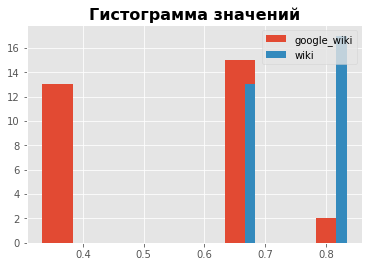

In [148]:
plt.hist(P6['google_wiki'],label="google_wiki")
plt.hist(P6['wiki'],label="wiki")
plt.legend(loc= 'upper right')
plt.title('Гистограмма значений',fontsize = 16,fontweight = 'bold')
for key in P1:
    P1[key] = np.array(P1[key]).sum()/len(P1[key])
for key in P3:
    P3[key] = np.array(P3[key]).sum()/len(P3[key])
for key in P6:
    P6[key] = np.array(P6[key]).sum()/len(P6[key])

In [149]:
google_line_plot = [P1['google_wiki'],P3['google_wiki'],P6['google_wiki']]
wiki_line_plot = [P1['wiki'],P3['wiki'],P6['wiki']]

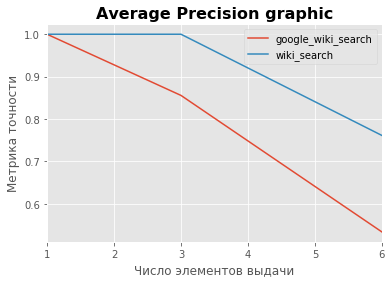

In [151]:
x = [1,3,6]
plt.plot(x,google_line_plot,label = 'google_wiki_search')
plt.plot(x,wiki_line_plot,label = 'wiki_search')
plt.legend(loc= 'upper right')
plt.title('Average Precision graphic',fontsize = 16,fontweight = 'bold')
plt.xlabel('Число элементов выдачи')
plt.ylabel('Метрика точности')
plt.xlim(1,6)
plt.plot();

# CG

In [194]:
CG_1 = {"google_wiki":[],"wiki":[]}
CG_3 = {"google_wiki":[],"wiki":[]}
CG_6 = {"google_wiki":[],"wiki":[]}


for item in SERP_dict:
    for key in item:
        CG_1[key].append(item[key])
        CG_3[key].append(np.array(item[key][:3]).sum())
        CG_6[key].append(np.array(item[key]).sum())

## CG@3

google_wiki CG_3
***********
Max value: 13
Min value: 10
Mean: 11.7
Std: 1.4866068747318506
25 percentile: 10.0
75 percentile: 13.0
***********
wiki CG_3
****
Max value: 13
Min value: 11
Mean: 11.566666666666666
Std: 0.6155395104206464
25 percentile: 11.0
75 percentile: 12.0
****


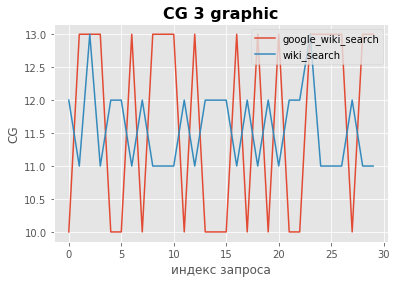

In [195]:
for key in CG_3:
    print(key + ' CG_3')
    print('*'*len(key))
    print('Max value:',np.array(CG_3[key]).max())
    print('Min value:',np.array(CG_3[key]).min())
    print('Mean:',np.array(CG_3[key]).mean())
    print('Std:',np.array(CG_3[key]).std())
    print('25 percentile:',np.percentile(np.array(CG_3[key]),25))
    print('75 percentile:',np.percentile(np.array(CG_3[key]),75))
    print('*'*len(key))
google_line_plot = CG_3['google_wiki']
wiki_line_plot = CG_3['wiki']
x = np.arange(0,len(google_line_plot))
plt.plot(x,google_line_plot,label = 'google_wiki_search')
plt.plot(x,wiki_line_plot,label = 'wiki_search')
plt.legend(loc= 'upper right')
plt.title('CG 3 graphic',fontsize = 16,fontweight = 'bold')
plt.xlabel('индекс запроса')
plt.ylabel('СG')
plt.plot();

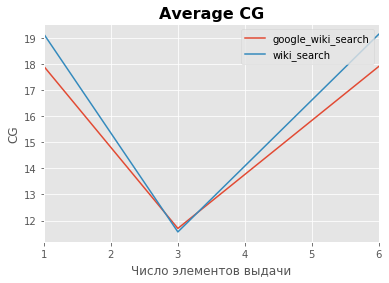

In [160]:
for key in CG_1:
    CG_1[key] = np.array(CG_1[key]).sum()/len(CG_1[key])
for key in CG_3:
    CG_3[key] = np.array(CG_3[key]).sum()/len(CG_3[key])
for key in CG_6:
    CG_6[key] = np.array(CG_6[key]).sum()/len(CG_6[key])

google_line_plot = [CG_1['google_wiki'],CG_3['google_wiki'],CG_6['google_wiki']]
wiki_line_plot = [CG_1['wiki'],CG_3['wiki'],CG_6['wiki']]
x = [1,3,6]
plt.plot(x,google_line_plot,label = 'google_wiki_search')
plt.plot(x,wiki_line_plot,label = 'wiki_search')
plt.legend(loc= 'upper right')
plt.title('Average CG',fontsize = 16,fontweight = 'bold')
plt.xlabel('Число элементов выдачи')
plt.ylabel('CG')
plt.xlim(1,6)
plt.plot();

# DCG

In [231]:
import math
DCG_1 = {"google_wiki":[],"wiki":[]}
DCG_3 = {"google_wiki":[],"wiki":[]}
DCG_6 = {"google_wiki":[],"wiki":[]}
for item in SERP_dict:
    for key in item:
        DCG_1[key].append(item[key][0]/math.log(2))
        value = 0
        for idx in range(3):
            value += item[key][idx]/math.log(idx + 2)
        DCG_3[key].append(value)
        value = 0
        for idx in range(len(item[key])):
            value += item[key][idx]/math.log(idx + 2)
        DCG_6[key].append(value)
            

google_wiki DCG_1
***********
Max value: 7.213475204444817
Min value: 7.213475204444817
Mean: 7.213475204444817
Std: 0.0
25 percentile: 7.213475204444817
75 percentile: 7.213475204444817
***********
wiki DCG_1
****
Max value: 7.213475204444817
Min value: 7.213475204444817
Mean: 7.213475204444817
Std: 0.0
25 percentile: 7.213475204444817
75 percentile: 7.213475204444817
****


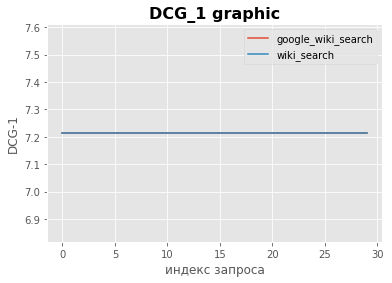

In [232]:
for key in DCG_1:
    print(key + ' DCG_1')
    print('*'*len(key))
    print('Max value:',np.array(DCG_1[key]).max())
    print('Min value:',np.array(DCG_1[key]).min())
    print('Mean:',np.array(DCG_1[key]).mean())
    print('Std:',np.array(DCG_1[key]).std())
    print('25 percentile:',np.percentile(np.array(DCG_1[key]),25))
    print('75 percentile:',np.percentile(np.array(DCG_1[key]),75))
    print('*'*len(key))
google_line_plot = DCG_1['google_wiki']
wiki_line_plot = DCG_1['wiki']
x = np.arange(0,len(google_line_plot))
plt.plot(x,google_line_plot,label = 'google_wiki_search')
plt.plot(x,wiki_line_plot,label = 'wiki_search')
plt.legend(loc= 'upper right')
plt.title('DCG_1 graphic',fontsize = 16,fontweight = 'bold')
plt.xlabel('индекс запроса')
plt.ylabel('DСG-1')
plt.plot();

google_wiki DCG_6
***********
Max value: 18.261743276620678
Min value: 13.963349091433544
Mean: 16.14215662518804
Std: 1.9093842710209918
25 percentile: 13.963349091433544
75 percentile: 17.747844934250928
***********
wiki DCG_6
****
Max value: 18.261743276620678
Min value: 16.630156529549357
Mean: 16.91067669586552
Std: 0.4084737025429402
25 percentile: 16.630156529549357
75 percentile: 17.026497413806446
****


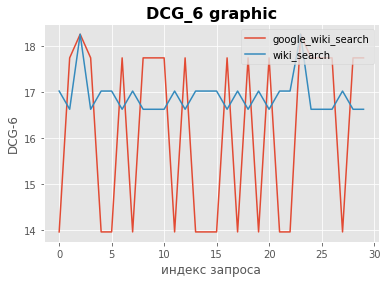

In [213]:
for key in DCG_6:
    print(key + ' DCG_6')
    print('*'*len(key))
    print('Max value:',np.array(DCG_6[key]).max())
    print('Min value:',np.array(DCG_6[key]).min())
    print('Mean:',np.array(DCG_6[key]).mean())
    print('Std:',np.array(DCG_6[key]).std())
    print('25 percentile:',np.percentile(np.array(DCG_6[key]),25))
    print('75 percentile:',np.percentile(np.array(DCG_6[key]),75))
    print('*'*len(key))
google_line_plot = DCG_6['google_wiki']
wiki_line_plot = DCG_6['wiki']
x = np.arange(0,len(google_line_plot))
plt.plot(x,google_line_plot,label = 'google_wiki_search')
plt.plot(x,wiki_line_plot,label = 'wiki_search')
plt.legend(loc= 'upper right')
plt.title('DCG_6 graphic',fontsize = 16,fontweight = 'bold')
plt.xlabel('индекс запроса')
plt.ylabel('DСG-6')
plt.plot();

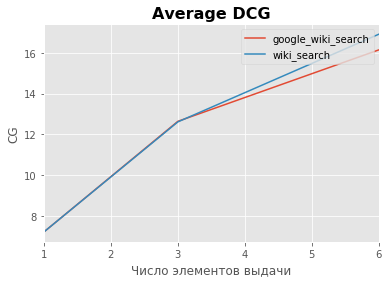

In [214]:
for key in DCG_1:
    DCG_1[key] = np.array(DCG_1[key]).sum()/len(DCG_3[key])
for key in DCG_3:
    DCG_3[key] = np.array(DCG_3[key]).sum()/len(DCG_3[key])
for key in DCG_6:
    DCG_6[key] = np.array(DCG_6[key]).sum()/len(DCG_6[key])

google_line_plot = [DCG_1['google_wiki'],DCG_3['google_wiki'],DCG_6['google_wiki']]
wiki_line_plot = [DCG_1['wiki'],DCG_3['wiki'],DCG_6['wiki']]
x = [1,3,6]
plt.plot(x,google_line_plot,label = 'google_wiki_search')
plt.plot(x,wiki_line_plot,label = 'wiki_search')
plt.legend(loc= 'upper right')
plt.title('Average DCG',fontsize = 16,fontweight = 'bold')
plt.xlabel('Число элементов выдачи')
plt.ylabel('CG')
plt.xlim(1,6)
plt.plot();

# NDCG

## IDCG

In [226]:
import math
IDCG_1 = {"google_wiki":[],"wiki":[]}
IDCG_3 = {"google_wiki":[],"wiki":[]}
IDCG_6 = {"google_wiki":[],"wiki":[]}
NDCG_1 = {"google_wiki":[],"wiki":[]}
NDCG_3 = {"google_wiki":[],"wiki":[]}
NDCG_6 = {"google_wiki":[],"wiki":[]}
for item in SERP_dict:
    for key in item:
        IDCG_1[key].append(sorted(item[key])[0]/math.log(2))
        value = 0
        for idx in range(3):
            value += sorted(item[key])[idx]/math.log(idx + 2)
        IDCG_3[key].append(value)
        value = 0
        for idx in range(len(item[key])):
            value += sorted(item[key])[idx]/math.log(idx + 2)
        IDCG_6[key].append(value)

google_wiki IDCG_6
***********
Max value: 15.067424279284074
Min value: 10.192361995653322
Mean: 12.499777676397326
Std: 2.0298175527741926
25 percentile: 10.192361995653322
75 percentile: 14.157185052657239
***********
wiki IDCG_6
****
Max value: 15.067424279284074
Min value: 13.535850118097626
Mean: 13.814019362214516
Std: 0.3755002545990696
25 percentile: 13.535850118097626
75 percentile: 13.887978718173215
****


[]

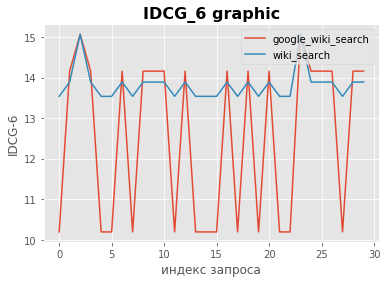

In [227]:
for key in IDCG_6:
    print(key + ' IDCG_6')
    print('*'*len(key))
    print('Max value:',np.array(IDCG_6[key]).max())
    print('Min value:',np.array(IDCG_6[key]).min())
    print('Mean:',np.array(IDCG_6[key]).mean())
    print('Std:',np.array(IDCG_6[key]).std())
    print('25 percentile:',np.percentile(np.array(IDCG_6[key]),25))
    print('75 percentile:',np.percentile(np.array(IDCG_6[key]),75))
    print('*'*len(key))
google_line_plot = IDCG_6['google_wiki']
wiki_line_plot = IDCG_6['wiki']
x = np.arange(0,len(google_line_plot))
plt.plot(x,google_line_plot,label = 'google_wiki_search')
plt.plot(x,wiki_line_plot,label = 'wiki_search')
plt.legend(loc= 'upper right')
plt.title('IDCG_6 graphic',fontsize = 16,fontweight = 'bold')
plt.xlabel('индекс запроса')
plt.ylabel('IDСG-6')
plt.plot()

In [228]:
for key in IDCG_1:
    NDCG_1[key] = np.array(DCG_1[key])/np.array(IDCG_1[key])
    NDCG_3[key] = np.array(DCG_3[key])/np.array(IDCG_3[key])
    NDCG_6[key] = np.array(DCG_6[key])/np.array(IDCG_6[key])

google_wiki NDCG_1
***********
Max value: 5.0
Min value: 2.5
Mean: 3.5833333333333335
Std: 1.2388390622765424
25 percentile: 2.5
75 percentile: 5.0
***********
wiki NDCG_1
****
Max value: 2.5
Min value: 2.5
Mean: 2.5
Std: 0.0
25 percentile: 2.5
75 percentile: 2.5
****


[]

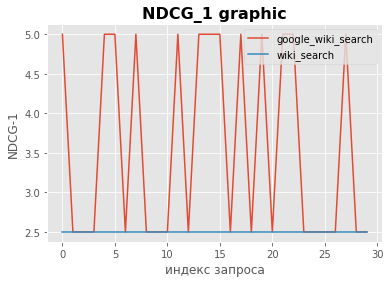

In [229]:
for key in NDCG_1:
    print(key + ' NDCG_1')
    print('*'*len(key))
    print('Max value:',np.array(NDCG_1[key]).max())
    print('Min value:',np.array(NDCG_1[key]).min())
    print('Mean:',np.array(NDCG_1[key]).mean())
    print('Std:',np.array(NDCG_1[key]).std())
    print('25 percentile:',np.percentile(np.array(NDCG_1[key]),25))
    print('75 percentile:',np.percentile(np.array(NDCG_1[key]),75))
    print('*'*len(key))
google_line_plot = NDCG_1['google_wiki']
wiki_line_plot = NDCG_1['wiki']
x = np.arange(0,len(google_line_plot))
plt.plot(x,google_line_plot,label = 'google_wiki_search')
plt.plot(x,wiki_line_plot,label = 'wiki_search')
plt.legend(loc= 'upper right')
plt.title('NDCG_1 graphic',fontsize = 16,fontweight = 'bold')
plt.xlabel('индекс запроса')
plt.ylabel('NDСG-1')
plt.plot()

google_wiki NDCG_6
***********
Max value: 1.583750325201567
Min value: 1.0713282062005511
Mean: 1.3278184286376342
Std: 0.22442860700012346
25 percentile: 1.1402094812738377
75 percentile: 1.583750325201567
***********
wiki NDCG_6
****
Max value: 1.2493250551921893
Min value: 1.122333610736355
Mean: 1.2250206899990084
Std: 0.031402566033267375
25 percentile: 1.2176485173999387
75 percentile: 1.2493250551921893
****


[]

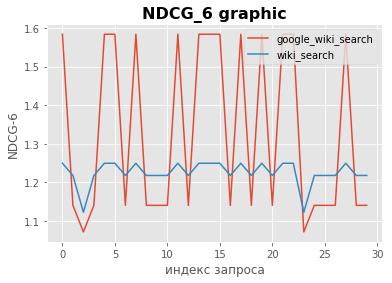

In [218]:
for key in NDCG_6:
    print(key + ' NDCG_6')
    print('*'*len(key))
    print('Max value:',np.array(NDCG_6[key]).max())
    print('Min value:',np.array(NDCG_6[key]).min())
    print('Mean:',np.array(NDCG_6[key]).mean())
    print('Std:',np.array(NDCG_6[key]).std())
    print('25 percentile:',np.percentile(np.array(NDCG_6[key]),25))
    print('75 percentile:',np.percentile(np.array(NDCG_6[key]),75))
    print('*'*len(key))
google_line_plot = NDCG_6['google_wiki']
wiki_line_plot = NDCG_6['wiki']
x = np.arange(0,len(google_line_plot))
plt.plot(x,google_line_plot,label = 'google_wiki_search')
plt.plot(x,wiki_line_plot,label = 'wiki_search')
plt.legend(loc= 'upper right')
plt.title('NDCG_6 graphic',fontsize = 16,fontweight = 'bold')
plt.xlabel('индекс запроса')
plt.ylabel('NDСG-6')
plt.plot()

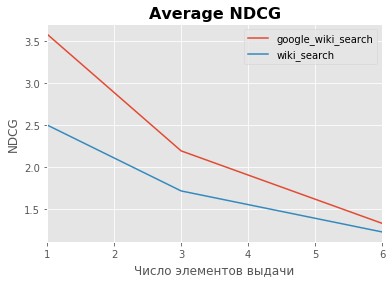

In [222]:
for key in NDCG_1:
    NDCG_1[key] = np.array(NDCG_1[key]).sum()/len(NDCG_3[key])
for key in NDCG_3:
    NDCG_3[key] = np.array(NDCG_3[key]).sum()/len(NDCG_3[key])
for key in NDCG_6:
    NDCG_6[key] = np.array(NDCG_6[key]).sum()/len(NDCG_6[key])

google_line_plot = [NDCG_1['google_wiki'],NDCG_3['google_wiki'],NDCG_6['google_wiki']]
wiki_line_plot = [NDCG_1['wiki'],NDCG_3['wiki'],NDCG_6['wiki']]
x = [1,3,6]
plt.plot(x,google_line_plot,label = 'google_wiki_search')
plt.plot(x,wiki_line_plot,label = 'wiki_search')
plt.legend(loc= 'upper right')
plt.title('Average NDCG',fontsize = 16,fontweight = 'bold')
plt.xlabel('Число элементов выдачи')
plt.ylabel('NDCG')
plt.xlim(1,6)
plt.plot();

# Err

In [234]:
def S(g):
    return (2**g - 1)/2**5

In [259]:
ERR_1 = {"google_wiki":[],"wiki":[]}
ERR_3 = {"google_wiki":[],"wiki":[]}
ERR_6 = {"google_wiki":[],"wiki":[]}
for item in SERP_dict:
    for key in item:
        ERR_1[key].append((1 - S(item[key][0]))*S(item[key][0]))
        value = (1 - S(item[key][0]))*S(item[key][0]) 
        for index in range(1,3):
            mult = 1
            for jdx in range(idx - 1):
                mult*=(1-S(item[key][jdx]))*S(item[key][jdx])
            value*= ( 1 / (idx + 1))*mult
        ERR_3[key].append(value)
        value = (1 - S(item[key][0]))*S(item[key][0]) 
        for index in range(1,6):
            mult = 1
            for jdx in range(idx - 1):
                mult*=(1-S(item[key][jdx]))*S(item[key][jdx])
            value*= ( 1 / (idx + 1))*mult
        ERR_6[key].append(value)
                

google_wiki ERR_1
***********
Max value: 0.0302734375
Min value: 0.0302734375
Mean: 0.0302734375
Std: 0.0
25 percentile: 0.0302734375
75 percentile: 0.0302734375
***********
wiki ERR_1
****
Max value: 0.0302734375
Min value: 0.0302734375
Mean: 0.0302734375
Std: 0.0
25 percentile: 0.0302734375
75 percentile: 0.0302734375
****


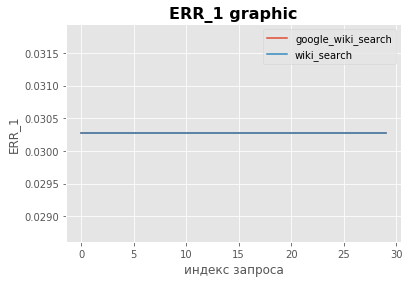

In [246]:
for key in ERR_1:
    print(key + ' ERR_1')
    print('*'*len(key))
    print('Max value:',np.array(ERR_1[key]).max())
    print('Min value:',np.array(ERR_1[key]).min())
    print('Mean:',np.array(ERR_1[key]).mean())
    print('Std:',np.array(ERR_1[key]).std())
    print('25 percentile:',np.percentile(np.array(ERR_1[key]),25))
    print('75 percentile:',np.percentile(np.array(ERR_1[key]),75))
    print('*'*len(key))
google_line_plot = ERR_1['google_wiki']
wiki_line_plot = ERR_1['wiki']
x = np.arange(0,len(google_line_plot))
plt.plot(x,google_line_plot,label = 'google_wiki_search')
plt.plot(x,wiki_line_plot,label = 'wiki_search')
plt.legend(loc= 'upper right')
plt.title('ERR_1 graphic',fontsize = 16,fontweight = 'bold')
plt.xlabel('индекс запроса')
plt.ylabel('ERR_1')
plt.plot();

google_wiki ERR_6
***********
Max value: 1.3234479617468064e-23
Min value: 1.624462900405615e-30
Mean: 7.499539153832494e-24
Std: 6.5581553226296195e-24
25 percentile: 1.624462900405615e-30
75 percentile: 1.3234479617468064e-23
***********
wiki ERR_6
****
Max value: 1.3234479617468064e-23
Min value: 3.066800687525537e-25
Mean: 1.908646845993357e-24
Std: 3.1368214938275583e-24
25 percentile: 3.066800687525537e-25
75 percentile: 2.014634239505866e-24
****


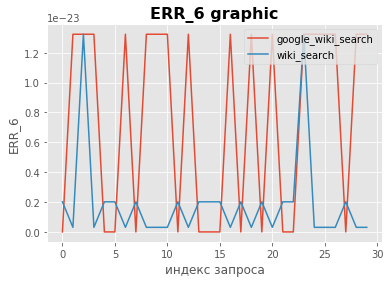

In [252]:
for key in ERR_6:
    print(key + ' ERR_6')
    print('*'*len(key))
    print('Max value:',np.array(ERR_6[key]).max())
    print('Min value:',np.array(ERR_6[key]).min())
    print('Mean:',np.array(ERR_6[key]).mean())
    print('Std:',np.array(ERR_6[key]).std())
    print('25 percentile:',np.percentile(np.array(ERR_6[key]),25))
    print('75 percentile:',np.percentile(np.array(ERR_6[key]),75))
    print('*'*len(key))
google_line_plot = ERR_6['google_wiki']
wiki_line_plot = ERR_6['wiki']
x = np.arange(0,len(google_line_plot))
plt.plot(x,google_line_plot,label = 'google_wiki_search')
plt.plot(x,wiki_line_plot,label = 'wiki_search')
plt.legend(loc= 'upper right')
plt.title('ERR_6 graphic',fontsize = 16,fontweight = 'bold')
plt.xlabel('индекс запроса')
plt.ylabel('ERR_6')
plt.plot();

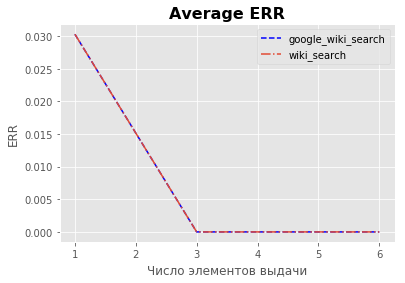

In [260]:
for key in ERR_1:
    ERR_1[key] = np.array(ERR_1[key]).sum()/len(ERR_1[key])
for key in ERR_3:
    ERR_3[key] = np.array(ERR_3[key]).sum()/len(ERR_3[key])
for key in ERR_6:
    ERR_6[key] = np.array(ERR_6[key]).sum()/len(ERR_6[key])

google_line_plot = [ERR_1['google_wiki'],ERR_3['google_wiki'],ERR_6['google_wiki']]
wiki_line_plot = [ERR_1['wiki'],ERR_3['wiki'],ERR_6['wiki']]
x = [1,3,6]
plt.plot(x,google_line_plot,'--',label = 'google_wiki_search',c='blue')
plt.plot(x,wiki_line_plot,'-.',label = 'wiki_search')
plt.legend(loc= 'upper right')
plt.title('Average ERR',fontsize = 16,fontweight = 'bold')
plt.xlabel('Число элементов выдачи')
plt.ylabel('ERR')
plt.plot();